### Timeseries for the Southern Region

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import math
import netCDF4
from netCDF4 import Dataset
from datetime import date, timedelta
import datetime as dt
from matplotlib.dates import DateFormatter, DayLocator, WeekdayLocator
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [2]:
#Reading in rd_t Datasets made in ensemble_mean script (odd=hightop, even=lowtop)
ct_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ct_rds.nc")
stdvt_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_erai_stdvt_rd.nc")
rt_mn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_era5_rd.nc")
t_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ecmwf_ensmn_south.nc")
t2_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/eccc_ensmn_south.nc")
t3_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ukmo_ensmn_south.nc")
t4_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cma_ensmn_south.nc")
t5_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/jma_ensmn_south.nc")
t6_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cnr_ensmn_south.nc")

In [3]:
#Reading in rd_t Datasets made in ensemble_mean script (odd=hightop, even=lowtop)
ct_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_erai_t_llmn.nc")
stdvt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_erai_stdvt_llmn.nc")
rt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_era5_llmn.nc")
t_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ecmwf_llmn_south.nc")
t2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/eccc_llmn_south.nc")
t3_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ukmo_llmn_south.nc")
t4_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cma_llmn_south.nc")
t5_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/jma_llmn_south.nc")
t6_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cnr_llmn_south.nc")

In [4]:
#rt_llmn_ds = xr.concat([rt1_llmn_ds,rt2_llmn_ds], dim='time')
#rt_mn_ds = xr.concat([rt1_mn_ds,rt2_mn_ds], dim='time')
t_data = rt_llmn_ds.t

In [5]:
#Creating variables for the step and date of forecast
step = t_llmn_ds.step["step.days"] #<-- days forecasted out (47)
fd = t_llmn_ds.date["date.dayofyear"] #<--day of forecast(8)
step2 = t2_llmn_ds.step["step.days"] #<-- days forecasted out (32)
fd2 = t2_llmn_ds.date["date.dayofyear"] #<--day of forecast(4)
step3 = t3_llmn_ds.step["step.days"] 
fd3 = t3_llmn_ds.date["date.dayofyear"]
step4 = t4_llmn_ds.step["step.days"] 
fd4 = t4_llmn_ds.date["date.dayofyear"]
step5 = t5_llmn_ds.step["step.days"] 
fd5 = t5_llmn_ds.date["date.dayofyear"]
step6 = t6_llmn_ds.step["step.days"]
fd6 = t6_llmn_ds.date["date.dayofyear"]

#Creating time and number variables
time = ct_llmn_ds['time']
rt_time = rt_llmn_ds.time['time.dayofyear']
n1 = t_llmn_ds['number'].to_numpy()
n2 = t2_llmn_ds['number'].to_numpy()
n3 = t3_llmn_ds['number'].to_numpy()
n4 = t4_llmn_ds['number'].to_numpy()
n5 = t5_llmn_ds['number'].to_numpy()
n6 = t6_llmn_ds['number'].to_numpy()

In [6]:
#Creating array of forecast day and step
doy1 = fd + step
doy2 = fd2 + step2
doy3 = fd3 + step3
doy4 = fd4 + step4
doy5 = fd5 + step5
doy6 = fd6 + step6

In [7]:
#Assigning number to climo lat/lon means
ct1_match = ct_llmn_ds.assign_coords(number=('number', n1))
ct2_match = ct_llmn_ds.assign_coords(number=('number', n2))
ct3_match = ct_llmn_ds.assign_coords(number=('number', n3))
ct4_match = ct_llmn_ds.assign_coords(number=('number', n4))
ct5_match = ct_llmn_ds.assign_coords(number=('number', n5))
ct6_match = ct_llmn_ds.assign_coords(number=('number', n6))

#Giving climo data forecast days and steps
ct1_match = ct1_match.sel(time=doy1)
ct2_match = ct2_match.sel(time=doy2)
ct3_match = ct3_match.sel(time=doy3)
ct4_match = ct4_match.sel(time=doy4)
ct5_match = ct5_match.sel(time=doy5)
ct6_match = ct6_match.sel(time=doy6)
ct_rt_match = ct_llmn_ds.sel(time=rt_time)
stdvt_match = stdvt_llmn_ds.sel(time=rt_time)

In [8]:
#Calculating Mean Area Temp Anoms
anom_t = t_llmn_ds - ct1_match
anom_t2 = t2_llmn_ds - ct2_match
anom_t3 = t3_llmn_ds - ct3_match
anom_t4 = t4_llmn_ds - ct4_match
anom_t5 = t5_llmn_ds - ct5_match
anom_t6 = t6_llmn_ds - ct6_match
anom_rt = rt_llmn_ds.t.values - ct_rt_match.t.values

In [9]:
#Making the actual anomalies back into xarray
anom_rt_da = xr.DataArray(data=anom_rt, dims=["time"], coords=dict(time=rt_time),
                        attrs=dict(description="Temperature Anomaly", units="Kelvin"),)

In [10]:
#Creating an ensemble mean of the lat/lon means in order to plot simple time series
t_llmn_ensmn_ds = anom_t.mean(dim='number')
t2_llmn_ensmn_ds = anom_t2.mean(dim='number')
t3_llmn_ensmn_ds = anom_t3.mean(dim='number')
t4_llmn_ensmn_ds = anom_t4.mean(dim='number')
t5_llmn_ensmn_ds = anom_t5.mean(dim='number')
t6_llmn_ensmn_ds = anom_t6.mean(dim='number')
t_ens_data = t_llmn_ensmn_ds.t
t_ens_eccc = t2_llmn_ensmn_ds.t
t_ens_uk = t3_llmn_ensmn_ds.t
t_ens_cma = t4_llmn_ensmn_ds.t
t_ens_jma = t5_llmn_ensmn_ds.t
t_ens_cnr = t6_llmn_ensmn_ds.t

In [11]:
stdvt_match_plot = -.75* stdvt_match
stdvt_match_plot.t.values

array([-5.101437 , -5.108244 , -5.114341 , -5.119724 , -5.124393 ,
       -5.128351 , -5.131602 , -5.1341534, -5.1360145, -5.137195 ,
       -5.1377106, -5.137575 , -5.136806 , -5.135423 , -5.1334467,
       -5.1308994, -5.127804 , -5.1241875, -5.1200733, -5.11549  ,
       -5.1104646, -5.1050267, -5.0992036, -5.0930257, -5.08652  ,
       -5.0797186, -5.072647 , -5.0653353, -5.05781  , -5.050098 ,
       -5.042226 , -5.0342183, -5.026098 , -5.017887 , -5.0096073,
       -5.0012774, -4.9929132, -4.984533 , -4.976147 , -4.96777  ,
       -4.95941  , -4.9510765, -4.942773 , -4.9345036, -4.9262705,
       -4.9180717, -4.9099064, -4.9017696, -4.8936543, -4.885551 ,
       -4.8774514, -4.869343 , -4.8612113, -4.853042 , -4.8448176,
       -4.836521 , -4.828134 , -4.819635 , -4.8110046], dtype=float32)

In [12]:
#the model reforecast date
year = 2021    
month = 1
day = 1

#below, number of forcast days in S2S data, for this info see: https://confluence.ecmwf.int/display/S2S/Models
total_days = 46           # how many days are we plotting? 
first_fhr = 0            # setting to 0 = 00 UTC, 6 = 06 UTC, ...
hours = total_days * 24  # total hours in time range to plot
hr_inc = 24               # the timestep for the data
startyear = year-20       #the ECMWF data has a range of 20 years from the reforecast year.

In [13]:
t_ensvar = t_ensmn_ds["t"]
ens_date = t_ensmn_ds["date"]

t_enseccc = t2_ensmn_ds["t"]
ens_date_eccc = t2_ensmn_ds["date"]

t_ensuk = t3_ensmn_ds["t"]
ens_date_uk = t3_ensmn_ds["date"]

t_enscma = t4_ensmn_ds["t"]
ens_date_cma = t4_ensmn_ds["date"]

t_ensjma = t5_ensmn_ds["t"]
ens_date_jma = t5_ensmn_ds["date"]

t_enscnr = t6_ensmn_ds["t"]
ens_date_cnr = t6_ensmn_ds["date"]

t_llmn_var = rt_llmn_ds["t"]
t_mn_var = rt_mn_ds["t"]

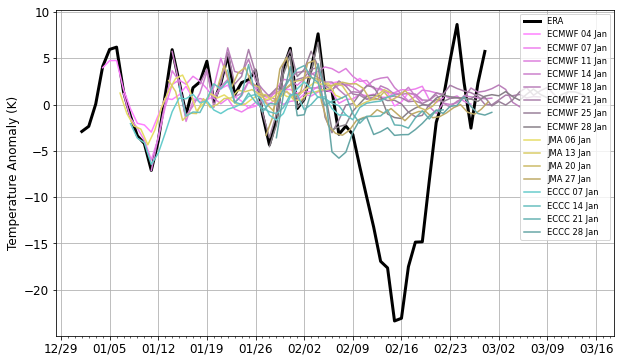

In [14]:
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    date1jan = dt.datetime(2021,1,1,0)
    dateclimo1 = dt.datetime(2021,1,1,0)
    dateclimo2 = dt.datetime(2021,3,1,0)
    climohrs = (dateclimo2-dateclimo1) / dt.timedelta(hours=1)

    #create an array of times we want to plot...
    #times = [date1 + dt.timedelta(hours=x) for x in range(0,hours,hr_inc)]
    climotimes = [dateclimo1 + dt.timedelta(hours=c) for c in range(0,int(climohrs),hr_inc)]
    combotimes = [date1jan + dt.timedelta(hours=c) for c in range(0,int(climohrs),hr_inc)]
    # in old code, dateclimo1 and date1jan were not equal, this is a hold over from that code
    
    tdata_JF = t_data.loc[dict(time=climotimes)]
    ax.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)

    
    for ddate in range(0,len(ens_date),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1 = ens_date[ddate]    # first date to plot
        t_data_date = t_ens_data.loc[dict(date=date1)]
        ## in the line below date is the inialization date and each time step is added to it to create an array of times
        t_dates = date1 + t_data_date.step  
        #print(t_data_date)
        # Specify how our lines should look
        colorR = (ddate) / 10. #used just to get some differnt colors on the plot
        date1_time = pd.to_datetime(str(date1.values)) #converts the date into a type datetime
        ax.plot(t_dates, t_data_date.values, color=(1-colorR/1.5,.5,1-colorR/1.5,), label='ECMWF '+date1_time.strftime('%d %b') ) 

    for ddate in range(0,len(ens_date_jma),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1jma = ens_date_jma[ddate]    # first date to plot
        t_dates_jma = date1jma + t_ens_jma.step
        t_jma_date = t_ens_jma.loc[dict(date=date1jma)]
        #print(t_jma_date)
        # Specify how our lines should look
        colorR = (ddate+2.) / 10.
        date1_timejma = pd.to_datetime(str(date1jma.values))
        ax.plot(t_dates_jma, t_jma_date.values, color=(1-colorR/2,1-colorR/1.5,0.4,), label='JMA '+date1_timejma.strftime('%d %b') ) 
  
    #for ddate in range(0,len(ens_date_cma),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        #date1cma = ens_date_cma[ddate]    # first date to plot
        #t_dates_cma= date1cma + t_ens_cma.step
        #t_cma_date = t_ens_cma.loc[dict(date=date1cma)]
        #print(t_uk_date)
        # Specify how our lines should look
        #colorR = (ddate) / 10.
        #date1_timecma = pd.to_datetime(str(date1cma.values))
        #ax.plot(t_dates_cma, t_cma_date.values, color=(1-colorR/2,1-colorR/2,0.2,), label='CMA '+date1_timecma.strftime('%d %b') ) 

    for ddate in range(0,len(ens_date_eccc),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1eccc = ens_date_eccc[ddate]    # first date to plot
        t_dates_eccc = date1eccc + t_ens_eccc.step
        t_eccc_date = t_ens_eccc.loc[dict(date=date1eccc)]
        #print(t_eccc_date)
        # Specify how our lines should look
        colorR = (ddate+4.) / 10.
        date1_timeeccc = pd.to_datetime(str(date1eccc.values))
        ax.plot(t_dates_eccc, t_eccc_date.values, color=(.4,1-colorR/2,1-colorR/2,), label='ECCC '+date1_timeeccc.strftime('%d %b') ) 
  
    # Add some plot lables and legends
    #ax.set_xlabel('Time')
    #ax.set_ylabel('Area Averaged Temperature (K)')
    #ax.set_title(' Area Avg Tempearture ECMWF S2S Reforecast')
    ax.grid(True)
    ax.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax.xaxis.set_major_locator(WeekdayLocator(TU))
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_minor_locator(DayLocator())
    plt.ylabel("Temperature Anomaly (K)")
    plt.savefig('S2S_temp_anom_timeseries_with_ERA5.jpg')
#    plt.title("S2S Time Series of Jan & Feb 2021 Temperature Anomalies")

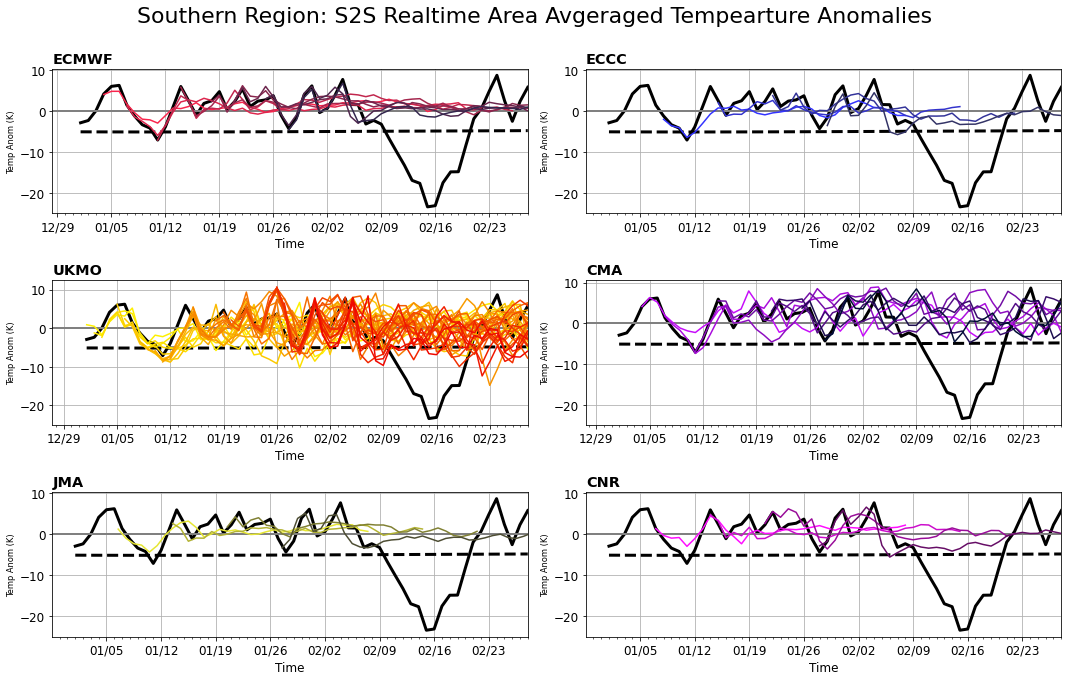

In [20]:
    plt.rc('font', size=12)
    fig, ((ax1, ax4), (ax3, ax5), (ax2, ax6)) = plt.subplots(3,2, figsize=(15, 9))
    date1jan = dt.datetime(2021,1,1,0)
    dateclimo1 = dt.datetime(2021,1,1,0)
    dateclimo2 = dt.datetime(2021,3,1,0)
    climohrs = (dateclimo2-dateclimo1) / dt.timedelta(hours=1)

    #create an array of times we want to plot...
    #times = [date1 + dt.timedelta(hours=x) for x in range(0,hours,hr_inc)]
    climotimes = [dateclimo1 + dt.timedelta(hours=c) for c in range(0,int(climohrs),hr_inc)]
    combotimes = [date1jan + dt.timedelta(hours=c) for c in range(0,int(climohrs),hr_inc)]
    # in old code, dateclimo1 and date1jan were not equal, this is a hold over from that code
    
    tdata_JF = t_data.loc[dict(time=climotimes)]

    ax1.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)
    ax1.axhline(y=0, xmin=0, xmax=60, color="gray", linewidth=2)
    ax1.plot(combotimes, stdvt_match_plot.t.values, color="black", linestyle= "--", linewidth=3)
    for ddate in range(0,len(ens_date),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1 = ens_date[ddate]    # first date to plot
        t_data_date = t_ens_data.loc[dict(date=date1)]
        ## in the line below date is the inialization date and each time step is added to it to create an array of times
        t_dates = date1 + t_data_date.step  
        #print(t_data_date)
        # Specify how our lines should look
        colorR = (ddate+2) / 9. #used just to get some differnt colors on the plot
        date1_time = pd.to_datetime(str(date1.values)) #converts the date into a type datetime
        ax1.plot(t_dates, t_data_date.values, color=(1.2-colorR,.15,.3,), label='ECMWF '+date1_time.strftime('%d %b') ) 
 # Add some plot lables and legends
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Temp Anom (K)', fontsize='x-small')
    ax1.set_title('ECMWF', loc='left', fontweight='bold')
    ax1.grid(True)
    #ax1.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax1.xaxis.set_major_locator(WeekdayLocator(TU))
    ax1.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax1.xaxis.set_minor_locator(DayLocator()) 
    right_bd = combotimes[58]
    ax1.set_xlim(right = right_bd)
    
    ax2.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)
    ax2.axhline(y=0, xmin=0, xmax=60, color="gray", linewidth=2)
    ax2.plot(combotimes, stdvt_match_plot.t.values, color="black", linestyle= "--", linewidth=3)
    for ddate in range(0,len(ens_date_jma),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1jma = ens_date_jma[ddate]    # first date to plot
        t_dates_jma = date1jma + t_ens_jma.step
        t_jma_date = t_ens_jma.loc[dict(date=date1jma)]
        #print(t_jma_date)
        # Specify how our lines should look
        colorR = (ddate+2.) / 5.
        date1_timejma = pd.to_datetime(str(date1jma.values))
        ax2.plot(t_dates_jma, t_jma_date.values, color=(1.3-colorR,1.3-colorR,.2,), label='JMA '+date1_timejma.strftime('%d %b') ) 
   # Add some plot lables and legends
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Temp Anom (K)', fontsize='x-small')
    ax2.set_title('JMA', loc='left', fontweight='bold')
    ax2.grid(True)
    ax2.set_xlim(right = right_bd)
    #ax2.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax2.xaxis.set_major_locator(WeekdayLocator(TU))
    ax2.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax2.xaxis.set_minor_locator(DayLocator())
    
    ax3.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)
    ax3.axhline(y=0, xmin=0, xmax=60, color="gray", linewidth=2)
    ax3.plot(combotimes, stdvt_match_plot.t.values, color="black", linestyle= "--", linewidth=3)
    for ddate in range(0,len(ens_date_uk),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1uk = ens_date_uk[ddate]    # first date to plot
        t_dates_uk= date1uk + t_ens_uk.step
        t_uk_date = t_ens_uk.loc[dict(date=date1uk)]
        #print(t_uk_date)
        # Specify how our lines should look
        colorR = (ddate+2) / 33.
        date1_timeuk = pd.to_datetime(str(date1uk.values))
        ax3.plot(t_dates_uk, t_uk_date.values, color=(1-colorR/15,1-colorR,0,), label='UKMO '+date1_timeuk.strftime('%d %b') ) 
 # Add some plot lables and legends
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Temp Anom (K)', fontsize='x-small')
    ax3.set_title('UKMO', loc='left', fontweight='bold')
    ax3.grid(True)
    ax3.set_xlim(right = right_bd)
    #ax.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax3.xaxis.set_major_locator(WeekdayLocator(TU))
    ax3.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax3.xaxis.set_minor_locator(DayLocator())
    
    ax4.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)
    ax4.axhline(y=0, xmin=0, xmax=60, color="gray", linewidth=2)
    ax4.plot(combotimes, stdvt_match_plot.t.values, color="black", linestyle= "--", linewidth=3)
    for ddate in range(0,len(ens_date_eccc),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1eccc = ens_date_eccc[ddate]    # first date to plot
        t_dates_eccc = date1eccc + t_ens_eccc.step
        t_eccc_date = t_ens_eccc.loc[dict(date=date1eccc)]
        #print(t_eccc_date)
        # Specify how our lines should look
        colorR = (ddate) / 5.
        date1_timeeccc = pd.to_datetime(str(date1eccc.values))
        ax4.plot(t_dates_eccc, t_eccc_date.values,  color=(.2,.2,1-colorR,), label='ECCC '+date1_timeeccc.strftime('%d %b') )
 # Add some plot lables and legends
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Temp Anom (K)', fontsize='x-small')
    ax4.set_title('ECCC', loc='left', fontweight='bold')
    ax4.grid(True)
    ax4.set_xlim(right = right_bd)
    #ax1.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax4.xaxis.set_major_locator(WeekdayLocator(TU))
    ax4.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax4.xaxis.set_minor_locator(DayLocator())
    
    ax5.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)
    ax5.axhline(y=0, xmin=0, xmax=60, color="gray", linewidth=2)
    ax5.plot(combotimes, stdvt_match_plot.t.values, color="black", linestyle= "--", linewidth=3)
    for ddate in range(0,len(ens_date_cma),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1cma = ens_date_cma[ddate]    # first date to plot
        t_dates_cma = date1cma + t_ens_cma.step
        t_cma_date = t_ens_cma.loc[dict(date=date1cma)]
        #print(t_cma_date)
        # Specify how our lines should look
        colorR = colorR = (ddate+2) /9.
        date1_timecma = pd.to_datetime(str(date1cma.values))
        ax5.plot(t_dates_cma, t_cma_date.values, color=(1-colorR,.05,1.2-colorR,), label='CMA '+date1_timecma.strftime('%d %b') )
 # Add some plot lables and legends
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Temp Anom (K)', fontsize='x-small')
    ax5.set_title('CMA', loc='left', fontweight='bold')
    ax5.grid(True)
    ax5.set_xlim(right = right_bd)
    #ax1.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax5.xaxis.set_major_locator(WeekdayLocator(TU))
    ax5.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax5.xaxis.set_minor_locator(DayLocator())
    
    ax6.plot(combotimes, anom_rt_da.values, color="Black", label='ERA ', linewidth=3)
    ax6.axhline(y=0, xmin=0, xmax=60, color="gray", linewidth=2)
    ax6.plot(combotimes, stdvt_match_plot.t.values, color="black", linestyle= "--", linewidth=3)
    for ddate in range(0,len(ens_date_cnr),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1cnr = ens_date_cnr[ddate]    # first date to plot
        t_dates_cnr = date1cnr + t_ens_cnr.step
        t_cnr_date = t_ens_cnr.loc[dict(date=date1cnr)]
        #print(t_cnr_date)
        # Specify how our lines should look
        colorR = (ddate) / 5.
        date1_timecnr = pd.to_datetime(str(date1cnr.values))
        ax6.plot(t_dates_cnr, t_cnr_date.values, color=(1-colorR,.05,1-colorR,), label='CNR '+date1_timecnr.strftime('%d %b') )     
 # Add some plot lables and legends
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Temp Anom (K)', fontsize='x-small')
    ax6.set_title('CNR', loc='left', fontweight='bold')
    ax6.grid(True)
    ax6.set_xlim(right = right_bd)
    #ax1.legend(loc='upper right',fontsize='x-small');

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax6.xaxis.set_major_locator(WeekdayLocator(TU))
    ax6.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax6.xaxis.set_minor_locator(DayLocator())

    plt.tight_layout()
    plt.suptitle('Southern Region: S2S Realtime Area Avgeraged Tempearture Anomalies', y=1.05, fontsize=22);